In [1]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
%matplotlib inline

# STEP 1. Скачайте датасет.

Download the Adult training data set: http://archive.ics.uci.edu/ml/datasets/Adult
(file adult.data)

In [ ]:
!wget http://archive.ics.uci.edu/ml/machine-learning-databases/adult/adult.data

In [2]:
!head adult.data

39, State-gov, 77516, Bachelors, 13, Never-married, Adm-clerical, Not-in-family, White, Male, 2174, 0, 40, United-States, <=50K
50, Self-emp-not-inc, 83311, Bachelors, 13, Married-civ-spouse, Exec-managerial, Husband, White, Male, 0, 0, 13, United-States, <=50K
38, Private, 215646, HS-grad, 9, Divorced, Handlers-cleaners, Not-in-family, White, Male, 0, 0, 40, United-States, <=50K
53, Private, 234721, 11th, 7, Married-civ-spouse, Handlers-cleaners, Husband, Black, Male, 0, 0, 40, United-States, <=50K
28, Private, 338409, Bachelors, 13, Married-civ-spouse, Prof-specialty, Wife, Black, Female, 0, 0, 40, Cuba, <=50K
37, Private, 284582, Masters, 14, Married-civ-spouse, Exec-managerial, Wife, White, Female, 0, 0, 40, United-States, <=50K
49, Private, 160187, 9th, 5, Married-spouse-absent, Other-service, Not-in-family, Black, Female, 0, 0, 16, Jamaica, <=50K
52, Self-emp-not-inc, 209642, HS-grad, 9, Married-civ-spouse, Exec-managerial, Husband, White, Male, 0, 0, 45, United-States, >50K
31, 

# Step 2. Поймите формат и зачитайте adult.data в переменную df. Используйте cols чтобы дать нормальные названия колонкам.

Обратите внимание на формат!

In [3]:
cols = ['age', 'workclass', 'fnlwgt', 'education', 'education-num', 'marital-status', 'occupation', 'relationship', 'race', 'sex', 'capital-gain', 'capital-loss', 'hours-per-week', 'native-country', 'result']

In [4]:
df = pd.read_csv('adult.data', sep = ',',names = cols)

In [5]:
df.head()

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,result
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


# Сколько мужчин и женщин?

In [6]:
df.groupby('sex').size()

sex
 Female    10771
 Male      21790
dtype: int64

# Средний возраст мужчин и женщин?

In [7]:
df.groupby('sex')['age'].mean()

sex
 Female    36.858230
 Male      39.433547
Name: age, dtype: float64

# Какая доля граждан США (United-States) в данном датасете?

In [8]:
df['native-country'].value_counts(normalize=True)[' United-States']

0.895857006848684

# Нарисуйте распределние образования людей (используйте bar plot)

Подпишите график и оси.

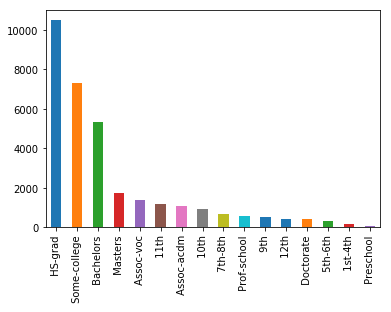

In [6]:
df['education'].value_counts().plot.bar(x="education", y="value")

# Какое среднее значние и квадратичное отклонение (std) fnlwgt (”final weight”) разведенных (divorced people) людей. Нарисуйте гистрограмму (Какое распределение оно вам напоминает?)

185802.79045689848
105646.78945933603


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f67da442fd0>]],
      dtype=object)

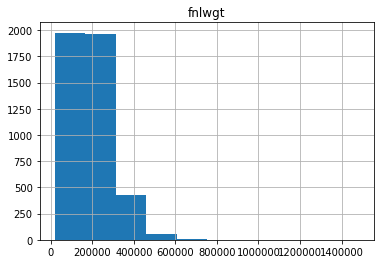

In [19]:
print(df[df['marital-status']==' Divorced']['fnlwgt'].mean())
print(df[df['marital-status']==' Divorced']['fnlwgt'].std())
df[df['marital-status']==' Divorced'].hist('fnlwgt')

In [21]:
'оно мне напоминает гамма-распределение'

'оно мне напоминает гамма-распределение'

> Ответ: оно мне напоминает ... распределение

# Правда ли, что большинство людей, из тех кто получает больше 50k, с высшим образованием  (BSc, MSc, PhD - ????)

In [82]:
educ = df[df['result'] == ' >50K'].groupby('education').size()
educ

education
 10th              62
 11th              60
 12th              33
 1st-4th            6
 5th-6th           16
 7th-8th           40
 9th               27
 Assoc-acdm       265
 Assoc-voc        361
 Bachelors       2221
 Doctorate        306
 HS-grad         1675
 Masters          959
 Prof-school      423
 Some-college    1387
dtype: int64

In [68]:
(educ[' Bachelors']+educ[' Doctorate']+educ[' Masters'])/educ.sum()

0.4445861497258003

> Ответ: Правда / Нет.

In [69]:
'Нет'

'Нет'

# Сколько в среднем работают люди в неделю в зависимости от education?

In [90]:
df.groupby('education')['hours-per-week'].mean()

education
 10th            37.052519
 11th            33.925957
 12th            35.780600
 1st-4th         38.255952
 5th-6th         38.897898
 7th-8th         39.366873
 9th             38.044747
 Assoc-acdm      40.504217
 Assoc-voc       41.610709
 Bachelors       42.614006
 Doctorate       46.973366
 HS-grad         40.575374
 Masters         43.836332
 Preschool       36.647059
 Prof-school     47.425347
 Some-college    38.852284
Name: hours-per-week, dtype: float64

# Кто больше работает в неделю - мужчины или женщины?

In [235]:
df.groupby('sex')['hours-per-week'].mean()

sex
 Female    36.410361
 Male      42.428086
Name: hours-per-week, dtype: float64

# Кто больше работает в неделю - те кто в отношениях или те кто нет?

In [332]:
rlsp_f = df['relationship'].isin([' Husband', ' Wife'])
mrts_f = df['marital-status'].isin([' Married-AF-spouse',' Married-civ-spouse',' Married-spouse-absent'])
rel_on = df[rlsp_f & mrts_f]
rel_of = df.drop(rel_on.index)
print('с отношениями', rel_on['hours-per-week'].mean(), 'без', rel_of['hours-per-week'].mean())

с отношениями 43.34909558972969 без 38.022921348314604


# Из каких стран люди работают farmers/fishers?

In [168]:
df[df['occupation'] == ' Farming-fishing'].groupby('native-country').size()

native-country
 ?                  5
 Cambodia           1
 Canada             2
 Cuba               2
 El-Salvador        2
 England            1
 France             1
 Germany            1
 Guatemala          4
 Hong               1
 Ireland            1
 Italy              2
 Japan              1
 Mexico            77
 Philippines        4
 Poland             1
 Portugal           1
 Puerto-Rico        5
 United-States    879
 Vietnam            2
 Yugoslavia         1
dtype: int64

# Сколько максимум работают люди в неделю? Как много таких людей кто работает наибольшее количество часов? Какой у них доход (распечатать)?

In [195]:
df.max()['hours-per-week']

99

In [219]:
df.groupby('hours-per-week').size()[df.max()['hours-per-week']]

85

In [227]:
df.groupby('hours-per-week')['result'].value_counts()[df.max()['hours-per-week']]

result
 <=50K    60
 >50K     25
Name: result, dtype: int64